In [1]:
import pandas as pd
import pickle
import copy
import matplotlib.pyplot as plt

# Leitura e pré-processamento dos dados para a criação da matrix de localização

In [2]:
df = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main_full.csv', index_col=False)
df.drop(columns={'Unnamed: 0'}, inplace=True)

In [3]:
def classe_sjdr(i):
    if (i.startswith('SJDR')) | (i.startswith('TR')):
        return 3
    else:
        return 2

In [4]:
df.dropna(subset=['DATE'], inplace=True)
df['HOUR'] = df['HOUR'].apply(lambda x: str(x))
df['TIME_RANGE'] = [str(x.split(':')[0]) for x in df['HOUR']]

In [5]:
df['TIME_RANGE'] = df['TIME_RANGE'].apply(lambda x: int(x))
df['TIME_RANGE'].unique()

array([17, 15, 16, 22, 19, 13, 20, 14,  9,  8, 11, 21, 18, 12, 10, 23,  5,
        6,  7,  0,  2,  1,  4,  3])

In [6]:
df.loc[(df['DAY_OF_WEEK'] == 'Saturday') | (df['DAY_OF_WEEK'] == 'Sunday'), 'TIME_RANGE'] = df['TIME_RANGE'] + 24

In [7]:
df['CLASSE'] = df['PRESUMED_RESIDENCE'].map(classe_sjdr)
df

,DATE,HOUR,DURATION,DDD_USER_FROM,USER_FROM,DDD_USER_TO,USER_TO,ANTENNA,8,9,10,11,12,13,14,DAY_OF_WEEK,ANTENNA_ID,PRESUMED_RESIDENCE,TIME_RANGE,CLASSE
0,2013-04-03,17:09:03,0.80,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,FFA5E22189ED7ADEB364CFEB18205B59,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,17,3
1,2013-04-09,15:34:30,5.12,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,CCA21FFF10C7EC088827F5D5770D3274,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,15,3
2,2013-04-09,15:23:38,1.53,83.0,00003F26576D1122848B6F3CEEC250E5,-4.0,64142FC9CDA8A82085271FB9D25FCDBF,50141.0,NaN,299.0,SERVICO NAO GEOGRAFICO,OI,TNL,PRE PAGO,300000210.0,Tuesday,SJDR5,SJDR5,15,3
3,2013-04-10,16:26:16,0.35,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,BD288CE0AB2A0B5E57EB635FBF814C80,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Wednesday,SJDR5,SJDR5,16,3
4,2013-04-12,22:47:37,0.07,83.0,00003F26576D1122848B6F3CEEC250E5,83.0,8BA3ED7CA5B5E5D556AF30AE93D578FD,50141.0,NaN,117.0,LOCAL,OI,OI,PRE PAGO,300000210.0,Friday,SJDR5,SJDR5,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494937,2013-04-08,19:07:47,0.63,61.0,FFFF6761884073022FB5DFE1B6F54DE3,61.0,4685E8968E615A30082B35B68AAAE498,51601.0,NaN,117.0,LOCAL,BRT,BRT,PRE PAGO,300000210.0,Monday,RT,RT,19,2
1494938,2013-04-10,21:48:42,1.32,61.0,FFFF6761884073022FB5DFE1B6F54DE3,61.0,4685E8968E615A30082B35B68AAAE498,51601.0,NaN,117.0,LOCAL,BRT,BRT,PRE PAGO,300000210.0,Wednesday,RT,RT,21,2
1494939,2013-04-11,08:30:53,3.93,61.0,FFFF6761884073022FB5DFE1B6F54DE3,61.0,4685E8968E615A30082B35B68AAAE498,51601.0,NaN,117.0,LOCAL,BRT,BRT,PRE PAGO,300000210.0,Thursday,RT,RT,8,2
1494940,2013-04-13,18:40:09,2.57,61.0,FFFF6761884073022FB5DFE1B6F54DE3,61.0,7700C6F0C0CB1DA5518304D1E9FA31F5,51601.0,NaN,117.0,LOCAL,BRT,BRT,PRE PAGO,300000210.0,Saturday,RT,RT,42,2


In [8]:
df_2 = df.loc[df['CLASSE'] == 2]
df_3 = df.loc[df['CLASSE'] == 3]

In [9]:
df_reduced = df[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]
df_reduced_2 = df_2[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]
df_reduced_3 = df_3[['USER_FROM', 'ANTENNA_ID', 'TIME_RANGE']]

# Criação da matrix de localização

In [10]:
location_matrix = df_reduced.groupby([*df_reduced.columns]).size()
location_matrix = location_matrix.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_2 = df_reduced_2.groupby([*df_reduced_2.columns]).size()
location_matrix_2 = location_matrix_2.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

location_matrix_3 = df_reduced_3.groupby([*df_reduced_3.columns]).size()
location_matrix_3 = location_matrix_3.unstack([1,2]).stack(dropna=False).fillna(0, downcast='infer')

In [11]:
location_matrix_2['TR2'] = 0
location_matrix_2

ANTENNA_ID                                   LD1  MDM  RT  SJDR1  SJDR2  \
USER_FROM                        TIME_RANGE                               
000579E8BA1DA9E5292392473BCCCD2A 0             0    0   0      0      0   
                                 1             0    0   0      0      0   
                                 2             0    0   0      0      0   
                                 3             0    0   0      0      0   
                                 4             0    0   0      0      0   
...                                          ...  ...  ..    ...    ...   
FFFF6761884073022FB5DFE1B6F54DE3 43            0    0   1      0      0   
                                 44            0    0   1      0      0   
                                 45            0    0   0      0      0   
                                 46            0    0   0      0      0   
                                 47            0    0   0      0      0   

ANTENNA_ID                                   SJDR3  SJDR4  SJDR5  ST  SVM  \
USER_FROM                        TIME_RANGE                                 
000579E8BA1DA9E5292392473BCCCD2A 0               0      0      0   0    0   
                                 1               0      0      0   0    0   
                                 2               0      0      0   0    0   
                                 3               0      0      0   0    0   
                                 4               0      0      0   0    0   
...                                            ...    ...    ...  ..  ...   
FFFF6761884073022FB5DFE1B6F54DE3 43              0      0      0   0    0   
                                 44              0      0      0   0    0   
                                 45              0      0      0   0    0   
                                 46              0      0      0   0    0   
                                 47              0      0      0   0    0   

ANTENNA_ID                                   TR1  TR2  
USER_FROM                        TIME_RANGE            
000579E8BA1DA9E5292392473BCCCD2A 0             0    0  
                                 1             0    0  
                                 2             0    0  
                                 3             0    0  
                                 4             0    0  
...                                          ...  ...  
FFFF6761884073022FB5DFE1B6F54DE3 43            0    0  
                                 44            0    0  
                                 45            0    0  
                                 46            0    0  
                                 47            0    0  

[901152 rows x 12 columns]

# Vetores de trajetória

In [12]:
trajectory_vector = location_matrix.groupby(['USER_FROM']).sum()
trajectory_vector_2 = location_matrix_2.groupby(['USER_FROM']).sum()
trajectory_vector_3 = location_matrix_3.groupby(['USER_FROM']).sum()

# Similaridade entre os vetores

In [13]:
import scipy.spatial.distance as ssd
import numpy as np

In [14]:
trajectory_vector_array = trajectory_vector.to_numpy()

In [15]:
trajectory_vector

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0
000579E8BA1DA9E5292392473BCCCD2A,21,0,0,0,1,0,0,1,0,0,0,0
0008962B966EF6C5571DF03F5C786677,0,0,0,3,18,0,0,0,0,0,0,0
0008B7FB336065A53EC31AD06D712E28,0,0,20,0,0,0,0,0,0,0,0,0
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
FFFA3339BA362F788F81DF22F3F7B6BA,0,31,0,0,0,0,0,0,0,0,0,0
FFFDA183352D8DD3AC2913B09BD4174F,0,0,0,0,0,0,38,0,0,0,0,0
FFFDBC5EE75F3127C262488987D6F99D,0,0,0,28,1,0,0,0,0,0,0,0


In [16]:
trajectory_vector_3

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
00003F26576D1122848B6F3CEEC250E5,0,0,0,0,0,0,0,12,0,0,0,0
0008962B966EF6C5571DF03F5C786677,0,0,0,3,18,0,0,0,0,0,0,0
0008B8E32E18BF4450B7CAAF0C1CE179,0,0,0,27,0,0,0,0,0,0,0,0
000A16372A762FD3BB2A59334780CDEA,0,0,0,9,2,0,0,0,0,0,0,0
000D1DF8B25B4C1728D16E1510BC72BE,0,0,0,0,0,0,0,22,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
FFF8A3C052069E4189F3559F328E6436,0,0,0,0,0,0,11,0,0,0,0,0
FFFA214539DDE26BAD4B20E6DBC1A9C4,0,0,0,0,0,0,0,33,0,0,0,0
FFFDA183352D8DD3AC2913B09BD4174F,0,0,0,0,0,0,38,0,0,0,0,0


In [17]:
trajectory_vector_2

ANTENNA_ID,LD1,MDM,RT,SJDR1,SJDR2,SJDR3,SJDR4,SJDR5,ST,SVM,TR1,TR2
USER_FROM,,,,,,,,,,,,
000579E8BA1DA9E5292392473BCCCD2A,21,0,0,0,1,0,0,1,0,0,0,0
0008B7FB336065A53EC31AD06D712E28,0,0,20,0,0,0,0,0,0,0,0,0
0008B94CADE67ACABE2CB3F8DB477CC5,11,0,0,0,0,0,0,0,0,0,0,0
000B663095EB50650DC40A0D8A23C868,0,0,0,0,0,2,0,0,0,19,0,0
001AB2E37F7F1378CABAB1D424EBD134,0,45,0,0,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
FFF81380C5ABF332403386B40D2D57DC,16,0,0,0,0,0,0,0,0,0,0,0
FFF9A5A86E188ECD19980841F849E8FC,44,0,0,0,0,0,0,0,0,0,0,0
FFF9FBB0D3B954829D00538A1A3283F8,0,0,12,0,0,0,0,0,0,0,0,0


In [18]:
file = open('/home/gustavo/Desktop/Mestrado/mestrado_dados/Arquivos_Pickle/dict_edges.pkl', 'rb')
dict_edge = pickle.load(file)

In [19]:
def calculate_cosine_similarity(t_v, dict_edge):
    to_remove_dict = {}
    for key in dict_edge.keys():
        for k in key:
            if k in t_v.index:
                pass
            else:
                to_remove_dict[key] = dict_edge[key]
    tuples = set(dict_edge).difference(to_remove_dict)
    new_dict = {}
    for i in tuples:
        new_dict[i] = dict_edge[i]
    for key, value in zip(new_dict.keys(), new_dict.values()):
        x = t_v.loc[key[0]].to_numpy()
        y = t_v.loc[key[1]].to_numpy()
        cosine = 1 - ssd.cosine(x,y)
        value['Cosine_Similarity'] = cosine
    return new_dict

In [20]:
dt_geral = calculate_cosine_similarity(trajectory_vector, dict_edge)
dt_2 = calculate_cosine_similarity(trajectory_vector_2, dict_edge)
dt_3 = calculate_cosine_similarity(trajectory_vector_3, dict_edge)

In [26]:
def dict_to_dataframe(new_dict):
    df_edges = pd.DataFrame.from_dict(new_dict, orient='index')
    df_edges = df_edges.reset_index()
    df_edges.rename(columns={'level_0': 'user_0', 'level_1': 'user_1'}, inplace=True)
    df_edges = df_edges.sort_values(['numcalls', 'Cosine_Similarity'])
    return df_edges

In [27]:
def plot_numcalls_similarity(df_edges):
    fig, ax = plt.subplots(figsize=(20,8))
    x = df_edges['numcalls'].to_numpy()
    y = df_edges['Cosine_Similarity'].to_numpy()
    plt.plot(x,y)
    plt.xlabel('Número de ligações')
    plt.ylabel('Similaridade do Cosseno')
    plt.show()

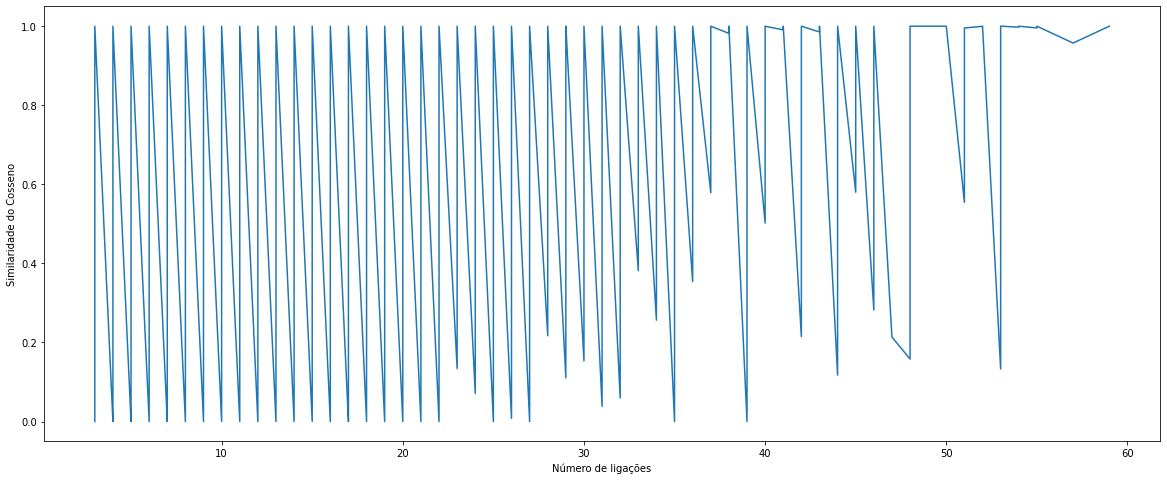

In [28]:
df_geral = dict_to_dataframe(dt_geral)
plot_numcalls_similarity(df_geral)

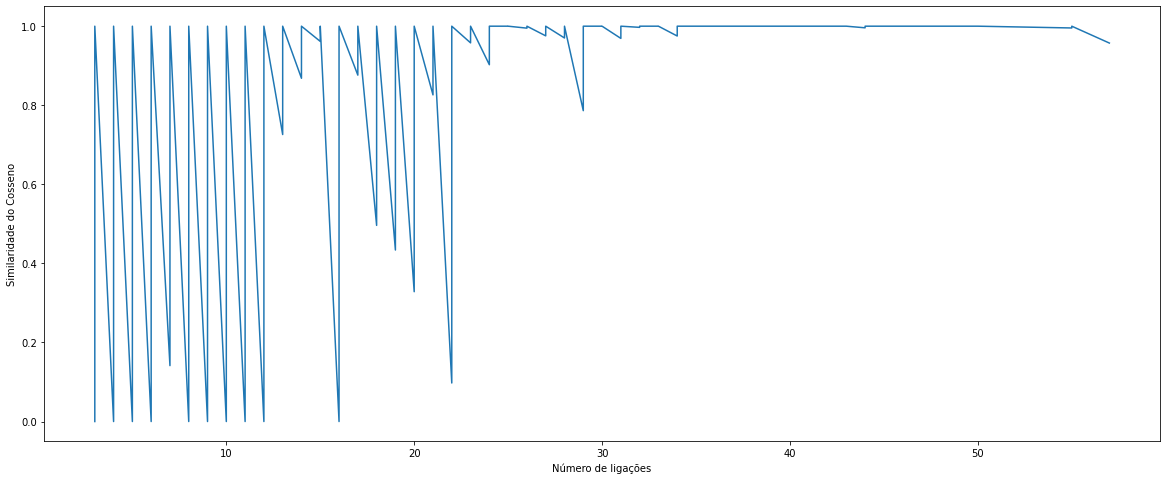

In [29]:
df_2 = dict_to_dataframe(dt_2)
plot_numcalls_similarity(df_2)

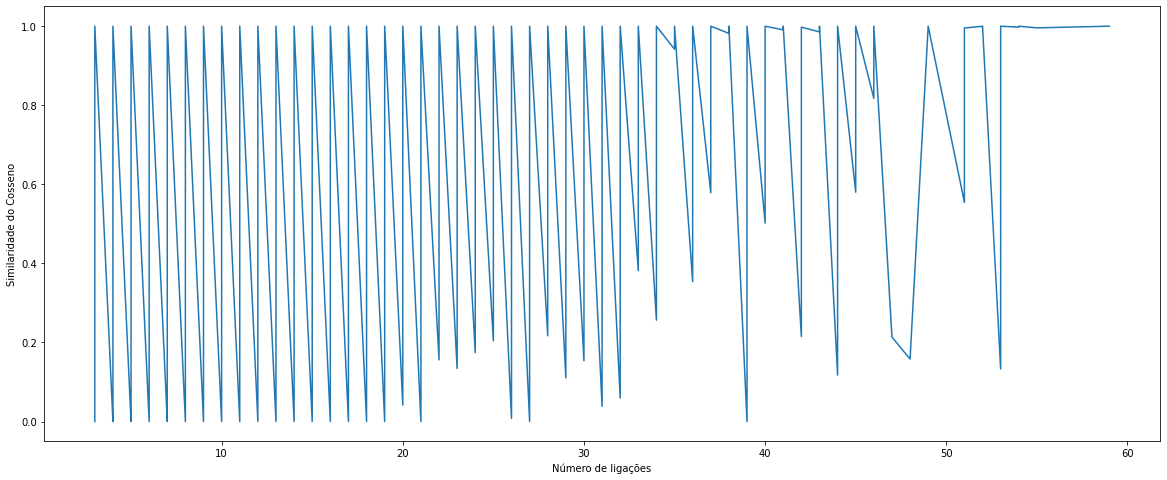

In [30]:
df_3 = dict_to_dataframe(dt_3)
plot_numcalls_similarity(df_3)